Skript to Visualize and Replicate Axtell 99

In [109]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import scipy.signal
import numpy as np

In [110]:
out_dir = "../results"

In [3]:
fig_dir = "../results/axtell_99/fig/"

In [4]:
opttype = 1

In [91]:
run = 500

In [92]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [113]:
path_f = f"{out_dir}/full_run_firm.csv"

In [94]:
path_w = f"{out_dir}/res_worker_agent_run{run}_opttype{opttype}.csv.gz"

In [95]:
path_m = f"{out_dir}/res_model_agent_run{run}_opttype{opttype}.csv.gz"

In [96]:
model_dk = dd.read_csv(path_m, blocksize=None)

In [97]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [98]:
stats = worker_dk[worker_dk["t"]== 0].compute()

In [99]:
stats

,t,id,effort,wealth,income,job_event,tenure,preference
0,0,1,0.526957,0.804641,0.804641,None,1,0.453005
1,0,3,0.982199,0.973456,0.973456,stay,1,0.985207
2,0,5,0.252708,0.316569,0.316569,None,1,0.219603
3,0,7,0.000000,0.667936,0.667936,stay,1,0.078400
4,0,9,0.000000,0.000000,0.000000,join_other,1,0.017463
...,...,...,...,...,...,...,...,...
995,0,1991,0.757618,1.331604,1.331604,None,1,0.685951
996,0,1993,0.557079,0.867416,0.867416,None,1,0.480877
997,0,1995,0.560580,0.874829,0.874829,stay,1,0.652175
998,0,1997,0.000000,0.506161,0.506161,join_other,1,0.218367


In [100]:
worker_df = worker_dk.groupby("t").mean().compute()

In [101]:
worker_df

,id,effort,wealth,income,tenure,preference
t,,,,,,
0,1000.0,0.446510,0.773105,0.773105,1.000,0.503439
1,1000.0,0.417737,1.621550,0.848445,1.512,0.503439
2,1000.0,0.387635,2.433524,0.811973,1.790,0.503439
3,1000.0,0.375527,3.241177,0.807653,1.928,0.503439
4,1000.0,0.366995,4.057170,0.815993,2.035,0.503439
...,...,...,...,...,...,...
995,1000.0,0.366282,792.544381,0.800895,2.074,0.503439
996,1000.0,0.364394,793.346310,0.801928,2.109,0.503439
997,1000.0,0.362731,794.131818,0.785508,2.179,0.503439


In [114]:
firm_dk = dd.read_csv(path_f , dtype={
    "t": "int16",
    "id": "int32",
    "age": "int16",
    "number_employees": "int32",
    "total_effort": "float64",
    "output": "float64",
    "average_pref": "float64"}
)

In [103]:
df = model_dk.compute()

In [104]:
average_number_of_firms = df["total_firms"].mean()

In [105]:
average_number_of_firms

532.99

In [115]:
firm_number = firm_dk.groupby(firm_dk.t).t.size().mean()

In [116]:
workers_check = firm_dk.groupby("t").number_employees.sum().compute()

In [117]:
workers_check

t
0      2200000
1      2200000
2      2200000
3      2200000
4      2200000
        ...   
995    2200000
996    2200000
997    2200000
998    2200000
999    2200000
Name: number_employees, Length: 1000, dtype: int32

In [83]:
firm_number.compute()

282.713

In [84]:
width = 390

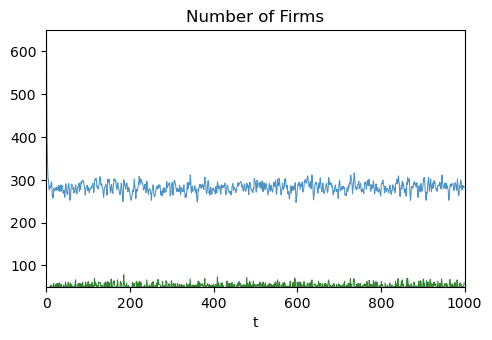

In [85]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([50,650])
ax.set_xlim([0,1000])
df.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8, legend=None)
df.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8, legend=None)
plt.title ("Number of Firms")
plt.savefig(f"{out_dir}/number_firms.pdf", format="pdf")
plt.show()

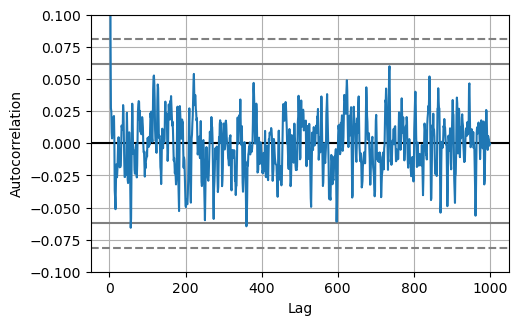

In [86]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([-0.1,0.1])
pd.plotting.autocorrelation_plot(series=df.total_firms, ax = ax)
plt.show()

In [87]:
average_firm = firm_dk.groupby(firm_dk.t).number_employees.mean().compute()

In [88]:
average_firm

t
0      1.338688
1      2.008032
2      2.583979
3      3.021148
4      3.300330
         ...   
995    3.496503
996    3.508772
997    3.496503
998    3.558719
999    3.533569
Name: number_employees, Length: 1000, dtype: float64

In [89]:
max_firm = firm_dk.groupby(firm_dk.t).number_employees.max().compute()

In [90]:
max_firm

t
0       3
1       9
2      12
3      13
4      23
       ..
995    23
996    23
997    23
998    26
999    22
Name: number_employees, Length: 1000, dtype: int32

In [1653]:
print(max_firm.mean())

15.248


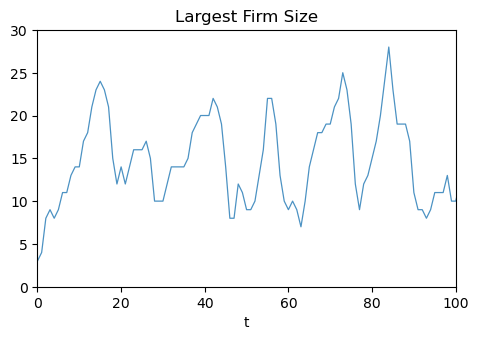

In [1654]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,30])
ax.set_xlim([0,100])
ax.set_title("Largest Firm Size")
max_firm.plot(kind="line", y = "Largest Firm Size", x="t", ax=ax, linewidth=0.9, alpha=0.8)
plt.xlabel("t")
plt.savefig(f"{out_dir}/size_largest.pdf", format="pdf")
plt.show()

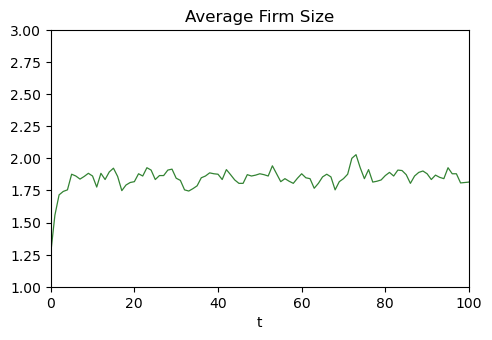

In [1656]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([1,3])
ax.set_xlim([0,100])
ax.set_title("Average Firm Size")
average_firm.plot(kind="line", y = "Average Firm Size", x="t", color="darkgreen", ax=ax, linewidth=0.9, alpha=0.8)
plt.xlabel("t")
plt.savefig(f"{fig_dir}/size_average.pdf", format="pdf")
plt.show()

Effort Levels

Average effort level (from worker df)

In [1579]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [1580]:
avg_effort = worker_dk.groupby(worker_dk.t).effort.mean().compute()

In [1581]:
avg_effort

t
0      0.447700
1      0.411659
2      0.389145
3      0.378677
4      0.375375
         ...   
995    0.370888
996    0.371041
997    0.367580
998    0.366810
999    0.365196
Name: effort, Length: 1000, dtype: float64

In [1582]:
firm_dk.assign(avg_e = firm_dk.total_effort/firm_dk.number_employees).groupby(firm_dk.t).number_employees.idxmax()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: number_employees, dtype: int64
Dask Name: series-groupby-idxmax-agg, 8 tasks

In [1583]:
filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)

C:\Users\41782\AppData\Local\Temp\ipykernel_11168\188437644.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)


In [1584]:
avg_effort_maxfirm = filtered_firm_dk.groupby("t").avg_e.mean().compute()

In [1585]:
avg_effort_maxfirm

t
0      0.300052
1      0.276422
2      0.181472
3      0.161308
4      0.273910
         ...   
995    0.196581
996    0.299457
997    0.460849
998    0.486329
999    0.417090
Name: avg_e, Length: 1000, dtype: float64

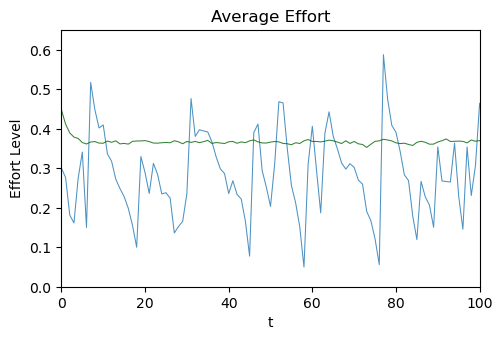

In [1603]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.65])
ax.set_xlim([0,100])
ax.set_title("Average Effort")
avg_effort_maxfirm.plot(kind="line", y = "avg_e", x="t", ax=ax, linewidth=0.75, alpha=0.8)
avg_effort.plot(kind="line", y = "effort", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.xlabel("t")
plt.ylabel("Effort Level")
plt.savefig(f"{out_dir}/effort_2.pdf", format="pdf")
plt.show()

Output Total and Largest Firm

In [1657]:
filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]

C:\Users\41782\AppData\Local\Temp\ipykernel_11168\2543161246.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]


In [1658]:
output_max_firm = filtered_firm_dk2.groupby("t").output.max().compute()

In [1659]:
output_max_firm

t
0       2.298790
1       7.242581
2       3.559419
3       3.559419
4       6.993006
         ...    
995     5.830221
996    19.799088
997    17.279239
998    33.968011
999    34.822032
Name: output, Length: 1000, dtype: float64

In [1660]:
output_total = firm_dk.groupby("t").output.sum().compute()

In [1661]:
output_total

t
0      768.813782
1      821.400765
2      814.114283
3      803.024314
4      817.166625
          ...    
995    791.918932
996    798.671530
997    793.763483
998    812.852472
999    804.225806
Name: output, Length: 1000, dtype: float64

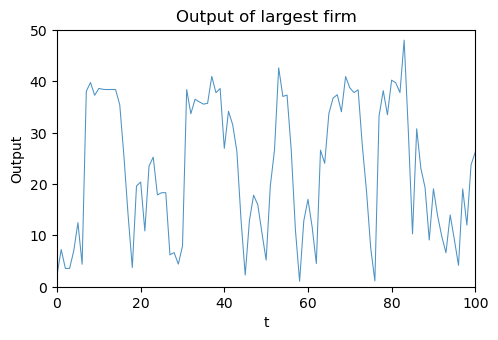

In [1670]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,50])
ax.set_xlim([0,100])
ax.set_title("Output of largest firm")
output_total.plot(kind="line", y = "output", x="t", ax=ax, linewidth=0.75, alpha=0.8, color="darkgreen")
output_max_firm.plot(kind="line", y = "output", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.xlabel("t")
plt.ylabel("Output")
plt.savefig(f"{fig_dir}/output_large.pdf", format="pdf")
plt.show()

Distribution of Firm Sizes
The distribution of firm sizes across industries has a very characteristic
shape, that of a power law (also commonly known as a scaling law or Pareto
distribution). Data on firm sizes, measured variously, have proven to have
broadly robust power law behavior over many decades and across national
borders, this despite waves of mergers and acquisitions. Power law
distributions of firm sizes are also characteristic of the non-equilibrium
model described above. This is studied in the next section. Following that,
the distribution of firm growth rates yielded by the model is compared with
data. Then, the distribution of firm lifetimes the model produces is studied.
These also follow a power law.
Axtell 99 S.39

Maximum firm age (for sampling period)

In [1826]:
max_age = firm_dk["age"].max().compute()

In [1827]:
max_age

68

In [1882]:
firm_df = firm_dk.compute()

In [1828]:
firm_size = firm_dk[["t", "number_employees"]].compute()

In [1883]:
employee_number = firm_size["number_employees"]

In [1884]:
employee_number

0          1
1          1
2          1
3          1
4          1
          ..
5174033    1
5174034    1
5174035    1
5174036    1
5174037    1
Name: number_employees, Length: 5174038, dtype: int32

In [1885]:
emp_list = list(employee_number)

In [1886]:
emp_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,


In [1888]:
count = pd.Series(emp_list).value_counts()

In [1890]:
type(count)

pandas.core.series.Series

In [1891]:
final_frequencies = count.divide(len(emp_list))

In [1892]:
final_frequencies

1     5.520263e-01
2     2.258267e-01
3     1.195316e-01
4     5.124025e-02
5     2.392116e-02
          ...     
76    9.663632e-07
78    9.663632e-07
80    9.663632e-07
84    7.730906e-07
85    5.798179e-07
Length: 85, dtype: float64

In [1829]:
dist=firm_size.groupby(["t", "number_employees"]).size()

In [1830]:
firm_size2 = firm_size[firm_size.t >= 1]

In [1831]:
firm_size2

,t,number_employees
801,1,1
802,1,1
803,1,2
804,1,1
805,1,1
...,...,...
5174033,9999,1
5174034,9999,1
5174035,9999,1
5174036,9999,1


In [1832]:
dist2 = firm_size2.groupby(["number_employees"]).number_employees.size()

In [1833]:
dist2.values.sum()

5173237

In [1834]:
dist2

number_employees
1     2855576
2     1168288
3      618440
4      265116
5      123769
       ...   
81          8
82          6
83          8
84          4
85          3
Name: number_employees, Length: 85, dtype: int64

In [1835]:
type(dist2)

pandas.core.series.Series

In [1836]:
print(dist2.sum())

5173237


In [1837]:
y_frequency_all = dist2.values/dist2.sum()

In [1893]:
y_frequency_all = final_frequencies.tolist()

In [1894]:
y_frequency_all

[0.5520262897180114,
 0.22582671406742663,
 0.11953159215297607,
 0.05124024987833487,
 0.023921161769588858,
 0.011495470269062577,
 0.006091567166688764,
 0.0034184132393306737,
 0.0019617173279361305,
 0.0011488125908623013,
 0.0007008066040489072,
 0.000444720351879905,
 0.0002928080543668214,
 0.0001752982873338,
 0.00011905594817819274,
 9.547668571432989e-05,
 7.363687703878479e-05,
 6.880506096012438e-05,
 6.030106466168204e-05,
 5.701542972819295e-05,
 5.372979479470387e-05,
 4.445270792367586e-05,
 4.155361827647961e-05,
 4.116707299018678e-05,
 3.904107391557619e-05,
 3.884780127242977e-05,
 3.730162012725844e-05,
 3.7108347484112025e-05,
 3.57554389820871e-05,
 3.362943990747652e-05,
 3.3242894621183684e-05,
 3.3242894621183684e-05,
 3.2663076691744435e-05,
 3.092362290342668e-05,
 3.015053233084102e-05,
 2.99572596876946e-05,
 2.9377441758255353e-05,
 2.9184169115108934e-05,
 2.8411078542523267e-05,
 2.8024533256230434e-05,
 2.7831260613084015e-05,
 2.705817004049835e-05,


In [1895]:
x_employees_all = final_frequencies.index.values.tolist()

In [1896]:
x_employees_all

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 25,
 27,
 24,
 30,
 28,
 23,
 29,
 26,
 32,
 41,
 47,
 34,
 33,
 37,
 45,
 35,
 43,
 49,
 31,
 39,
 42,
 38,
 48,
 46,
 40,
 36,
 44,
 50,
 51,
 53,
 54,
 57,
 56,
 60,
 55,
 63,
 59,
 58,
 52,
 61,
 65,
 66,
 67,
 64,
 70,
 68,
 69,
 62,
 71,
 72,
 73,
 74,
 75,
 77,
 83,
 81,
 82,
 79,
 76,
 78,
 80,
 84,
 85]

In [1897]:
d = {"Employees": x_employees_all, "Count": y_frequency_all}

In [1898]:
df = pd.DataFrame(d)

 powerlaw not good for extreme cases, low and high prune

In [1899]:
df.to_csv(f"{out_dir}/frequency.csv")

In [1900]:
df_big = df[df.Count > 10**(-5)]

In [1901]:
df_big = df_big[1:]

weibull not needed to prune

In [1902]:
# df_big = df

In [1903]:
df_big

,Employees,Count
1,2,0.225827
2,3,0.119532
3,4,0.051240
4,5,0.023921
5,6,0.011495
...,...,...
64,67,0.000012
65,64,0.000012
66,70,0.000011
67,68,0.000011


In [1904]:
x_new = df_big.Employees
y_new = df_big.Count

function to sample firm size (employee) distribution for different t's

In [1849]:
def sample_dist(dist, start, max_age, numb_samples):
    df_list = []
    for x in range(numb_samples):
        i = start + x * max_age
        sample = dist.loc[i, :]
        freq = sample / sample.sum()
        freq_df = freq.reset_index(inplace=False)
        freq_df = freq_df.rename(columns={0: f"Frequency{x}"})
        df_list.append(freq_df)
    return df_list

In [1850]:
dfs = sample_dist(dist, 1, 10, 10)

In [1851]:
from functools import reduce

In [1852]:
df3 = reduce(lambda left,right: pd.merge(left,right,on=["number_employees"], how="outer"), dfs)

In [1853]:
df3

,number_employees,Frequency0,Frequency1,Frequency2,Frequency3,Frequency4,Frequency5,Frequency6,Frequency7,Frequency8,Frequency9
0,1,0.610429,0.570384,0.556641,0.539078,0.538614,0.543353,0.502982,0.546875,0.565934,0.593156
1,2,0.271472,0.213894,0.218750,0.230461,0.225743,0.229287,0.234592,0.230469,0.238095,0.193916
2,3,0.096626,0.140768,0.105469,0.134269,0.134653,0.123314,0.163022,0.128906,0.098901,0.115970
3,4,0.018405,0.029250,0.056641,0.048096,0.061386,0.059730,0.043738,0.042969,0.036630,0.038023
4,5,0.001534,0.021938,0.019531,0.022044,0.015842,0.015414,0.023857,0.019531,0.038462,0.024715
5,6,0.001534,0.016453,0.017578,0.010020,0.003960,0.013487,0.017893,0.015625,0.012821,0.013308
6,7,NaN,0.003656,0.015625,0.004008,0.007921,0.009634,0.007952,0.003906,0.003663,0.009506
7,8,NaN,0.001828,0.001953,NaN,0.005941,NaN,0.001988,0.003906,0.003663,0.001901
8,23,NaN,0.001828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,0.001953,0.002004,NaN,0.001927,NaN,NaN,NaN,0.001901


In [1854]:
df3['avg'] = df3.iloc[:,1:].mean(axis=1)

In [1855]:
# df3['size'] = df3.iloc[:,1:].size(axis=1)

In [1856]:
df3 = df3.iloc[1:20,:]

In [1857]:
dfplot = df3[["number_employees", "avg"]]

In [1858]:
x_employees = df3["number_employees"].values.tolist()

In [1859]:
y_frequency = df3["avg"].values.tolist()

In [1860]:
y_frequency

[0.22866797296243088,
 0.12418972087371286,
 0.04348677463651113,
 0.020286724183947034,
 0.012267930319694548,
 0.007319029997383268,
 0.003025762648899463,
 0.0018281535648994515,
 0.0019462639935114484,
 0.0032642326732673266,
 0.001953125,
 0.0026097457108111705,
 0.001964406757006417,
 0.002004008016032064,
 0.002004008016032064,
 0.0019801980198019802,
 0.0019267822736030828,
 0.001953125,
 0.0018315018315018315]

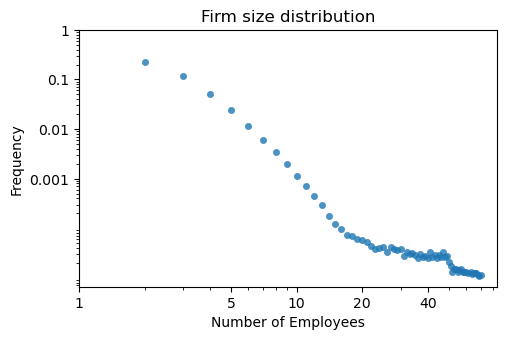

In [1906]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Firm size distribution")
ticks = (1,5,10,20, 40)
ticksy = (0.001, 0.01, 0.1, 1)
df_big.plot("Employees","Count",kind="scatter", ax=ax, linewidth=0.45, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
ax.set_ylabel("Frequency")
ax.set_xlabel("Number of Employees")
plt.show()

Fit the firmsize power-law data

In [1907]:
# Function to calculate the power-law with constants a and b
def power_law(x, b):
    return np.power(x, -(1+b), dtype=float)

In [1908]:
def weibull(x, a, b):
    return 1-np.exp(-a*x**b, dtype=float)

def gld(x, a, b):
    return 1-(1+a*x/b)**((-1)/a)

In [1909]:
from scipy.optimize import curve_fit

In [1910]:
pars, cov = curve_fit(f=power_law, xdata= x_new, ydata=y_new, p0=0, bounds=(-np.inf, np.inf))

In [1911]:
pars

array([1.13020003])

In [1912]:
pars2, cov2 = curve_fit(f=weibull, xdata= x_new, ydata=y_new, p0=[0,0], bounds=(-np.inf, np.inf))

In [1913]:
# not found optima
# pars3, cov3 = curve_fit(f=gld, xdata= x_new, ydata=y_new, p0=[0,0], bounds=(-np.inf, np.inf))

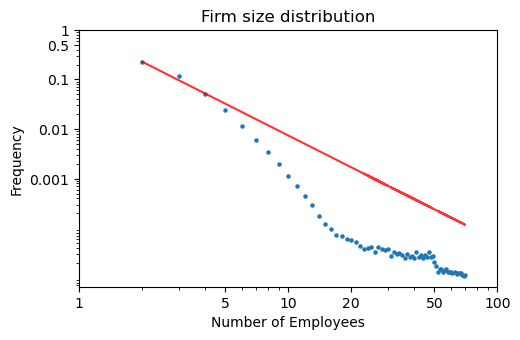

In [1926]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Firm size distribution")
ticks = (1,5,10,20, 50, 100)
ticksy = (0.001, 0.01, 0.1, 0.5, 1)
ax.loglog()
plt.plot(x_new, power_law(x_new, *pars), label="fit", color="red", alpha=0.8)
plt.scatter(x_new, y_new, s=5)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
ax.set_ylabel("Frequency")
ax.set_xlabel("Number of Employees")
plt.savefig(f"{fig_dir}/fitted_dist.pdf", format="pdf")
plt.show()

Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)

In [1927]:
stdevs = np.sqrt(np.diag(cov))

In [1928]:
stdevs2 = np.sqrt(np.diag(cov2))

Calculate the residuals

In [1929]:
res = y_new - power_law(x_new, *pars)

In [1930]:
ss_res = np.sum(res**2)

In [1931]:
ss_res

0.00111306904447548

In [1932]:
ss_tot = np.sum((y_new-np.mean(y_new))**2)

In [1933]:
ss_tot

0.06571960072853311

In [1934]:
res2 = y_new - weibull(x_new, *pars2)

In [1935]:
ss_res2 = np.sum(res2**2)

In [1936]:
ss_tot2 = np.sum((y_new-np.mean(y_new))**2)

In [1937]:
r_squared = 1-(ss_res/ss_tot)

In [1938]:
r_squared

0.9830633626477249

In [1939]:
r_squared2 = 1-(ss_res2/ss_tot2)

In [1940]:
r_squared2

0.9864741271892514

In [1941]:
pars

array([1.13020003])

In [1942]:
pars2

array([ 1.34644291, -2.3458247 ])

In [1042]:
test = dist.loc[500, :]

In [1043]:
test

number_employees
1     247
2     119
3      60
4      32
5      22
6       8
7       2
8       1
10      1
17      1
dtype: int64

In [915]:
frequency = test/test.sum()

In [916]:
freq_df = frequency.reset_index(inplace=False)

In [917]:
freq_df = freq_df.rename(columns={0:"Frequency"})

In [918]:
freq_df

,number_employees,Frequency
0,1,0.547206
1,2,0.238921
2,3,0.105973
3,4,0.057803
4,5,0.023121
5,6,0.007707
6,7,0.005780
7,8,0.005780
8,9,0.001927
9,11,0.001927


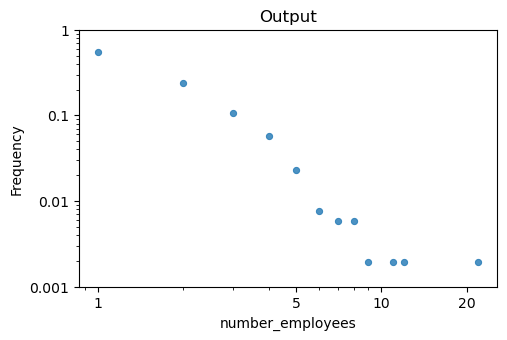

In [919]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20)
ticksy = (0.001, 0.01, 0.1, 1)
freq_df.plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Overall Behavior of Agents, I (Population Cross-Section)

In [920]:
effort_dist = worker_dk[["t", "effort"]].compute()
dist_e = effort_dist.groupby(["t", "effort"]).size()

In [921]:
dist_e

t    effort  
0    0.000000    161
     0.000302      1
     0.001578      1
     0.003230      1
     0.005677      1
                ... 
999  0.998096      1
     0.998708      1
     0.998777      1
     0.999090      1
     0.999196      1
Length: 615929, dtype: int64

In [922]:
dfs_e = sample_dist(dist_e, 300, 30, 200)

df_e = reduce(lambda left, right: pd.merge(left, right, on=["effort"], how="outer"), dfs_e)
df_e['avg'] = df_e.iloc[:, 1:].mean(axis=1)
df_e = df_e.iloc[1:, :]
dfplot_e = df_e[["effort", "avg"]]
x_effort = df_e["effort"].values.tolist()
y_frequency_e = df3["avg"].values.tolist()

KeyError: 1020

In [923]:
y_frequency_e

NameError: name 'y_frequency_e' is not defined

NameError: name 'dfplot_e' is not defined

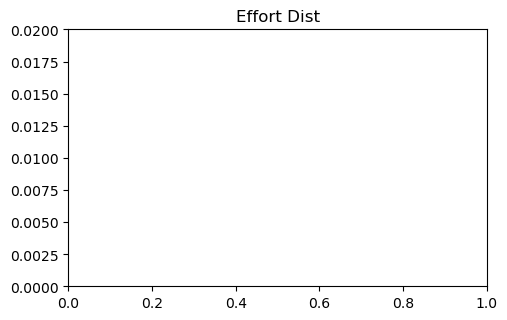

In [924]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.02])
ax.set_xlim([0,1])
ax.set_title("Effort Dist")
dfplot_e.plot("effort","avg",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()